In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Traffic.csv')
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [5]:
df.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


In [11]:
data = df.copy()
data.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [12]:
data.columns = data.columns.str.strip()             # Remove leading/trailing spaces
data.columns = data.columns.str.replace(' ', '_')  # Replace spaces with underscores
print(data.columns)

Index(['Time', 'Date', 'Day_of_the_week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic_Situation'],
      dtype='object')


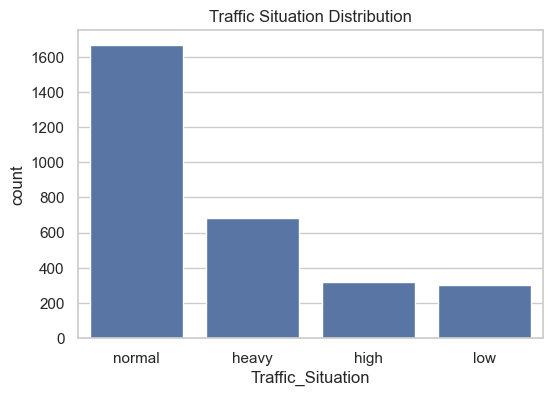

In [15]:
sns.set(style="whitegrid")

# 1. Distribution of the Target variable (Traffic Situation)
plt.figure(figsize=(6,4))
sns.countplot(x='Traffic_Situation', data=data, order=data['Traffic_Situation'].value_counts().index)
plt.title('Traffic Situation Distribution')
plt.show()

Observations:
------------
1.The 'normal' traffic condition is the most frequent, with over 1600 instances.
2.The 'heavy' traffic situation follows, occurring in ~700 records.
3.The 'high' and 'low' traffic conditions are least represented, both below 350 instances.

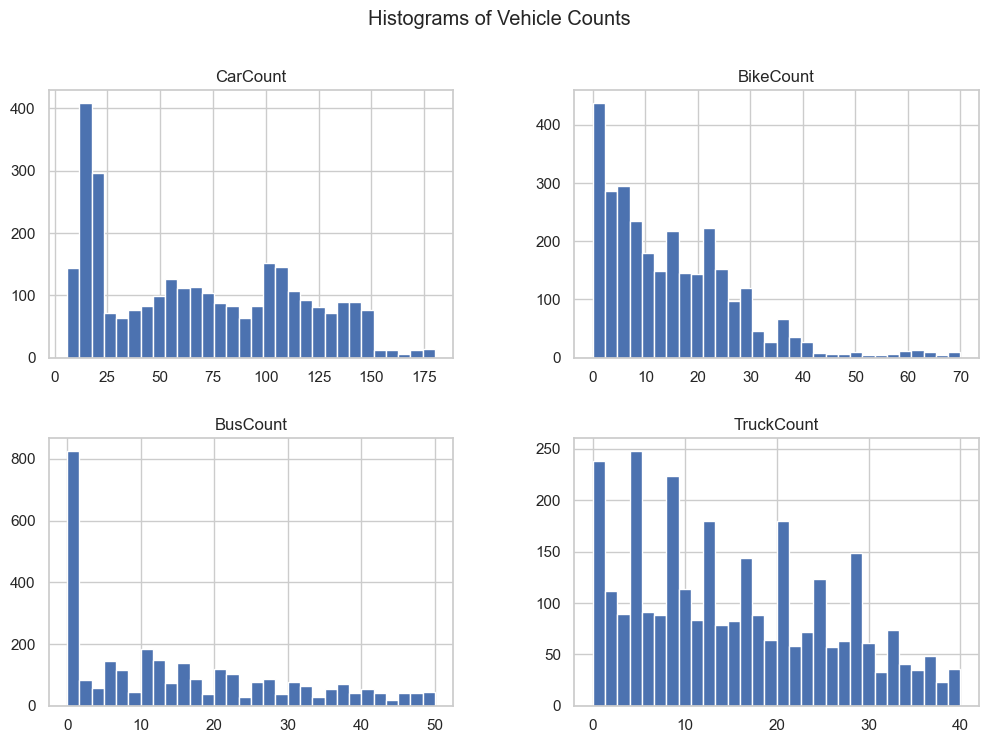

In [16]:
data[['CarCount','BikeCount','BusCount','TruckCount']].hist(bins=30, figsize=(12,8))
plt.suptitle('Histograms of Vehicle Counts')
plt.show()

Observations:
------------
1.Car and bike counts show a high frequency of low values, with distributions skewed to the right.
2.Bus counts are overwhelmingly concentrated at very low numbers (0-5), indicating less frequent bus presence.
3.Truck counts are also low but show a slightly wider spread than buses, suggesting more variability.

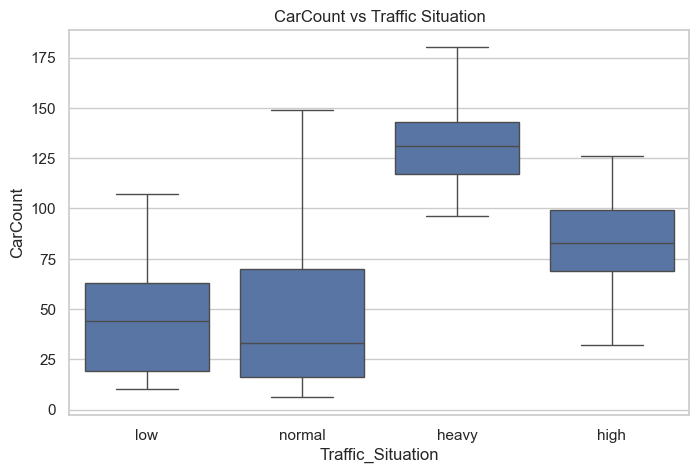

In [18]:
# 3. Boxplot of CarCount by Traffic Situation
plt.figure(figsize=(8,5))
sns.boxplot(x='Traffic_Situation', y='CarCount', data=data)
plt.title('CarCount vs Traffic Situation')
plt.show()

Observations:
------------
1.Car count increases as traffic severity shifts from "low" to "heavy", indicating a direct correlation between vehicle volume and congestion.
2."Heavy" traffic has the highest median car count, reflecting peak road usage.
3."High" traffic shows a lower median than "heavy", suggesting that it may be influenced by factors beyond just car count, such as bus/truck volume, road conditions, or time of day.


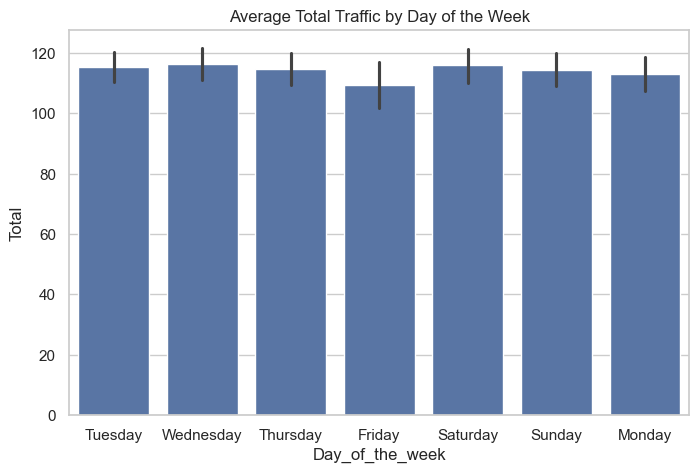

In [30]:
# 4. Average Total traffic by Day of the Week
plt.figure(figsize=(8,5))
sns.barplot(x='Day_of_the_week', y='Total', data=data)
plt.title('Average Total Traffic by Day of the Week')
plt.show()

Observations:
------------
1.Average total traffic remains largely consistent across all days, hovering around 110-115.
2.Weekdays and weekends show similar average traffic levels, with no significant dips or surges.
3.This indicates that the day of the week alone isn't a primary driver of major average traffic fluctuations.


In [31]:
# Convert 'Time' to datetime and extract hour
data['Hour'] = pd.to_datetime(data['Time'], format='%I:%M:%S %p').dt.hour


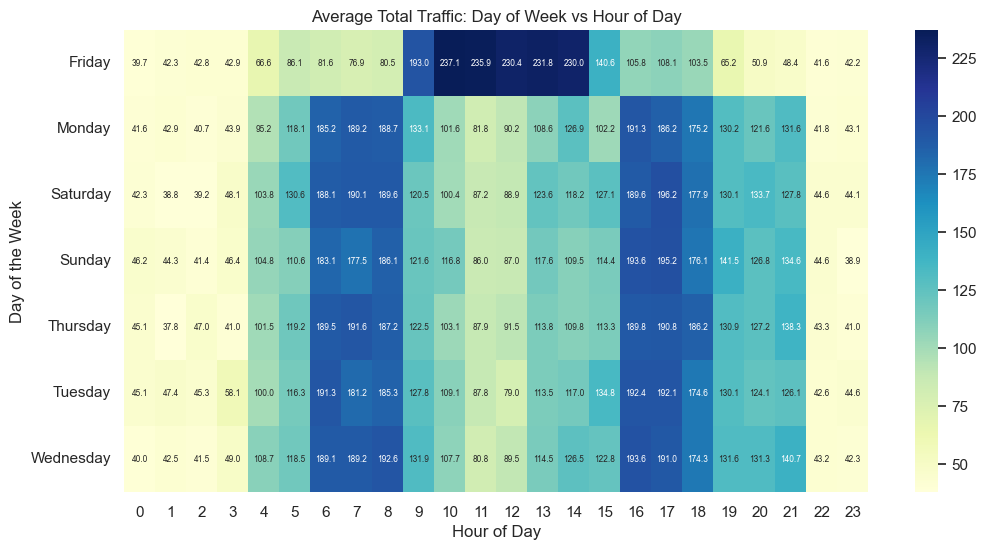

In [34]:
pivot_table = data.pivot_table(values='Total', index='Day_of_the_week', columns='Hour', aggfunc='mean')

plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f", annot_kws={"size": 6})
plt.title('Average Total Traffic: Day of Week vs Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of the Week')
plt.show()


Observations:
------------
1.Weekdays show clear rush hour patterns — peak traffic occurs during 7–9 AM and 4–6 PM, indicating commuting trends.
2.Friday mornings, especially around 8–9 AM, record the highest average traffic, peaking above 230.
3.Weekend traffic (Saturday and Sunday) is more evenly spread across the day, with no sharp peaks, suggesting reduced work-related travel and more flexible movement.

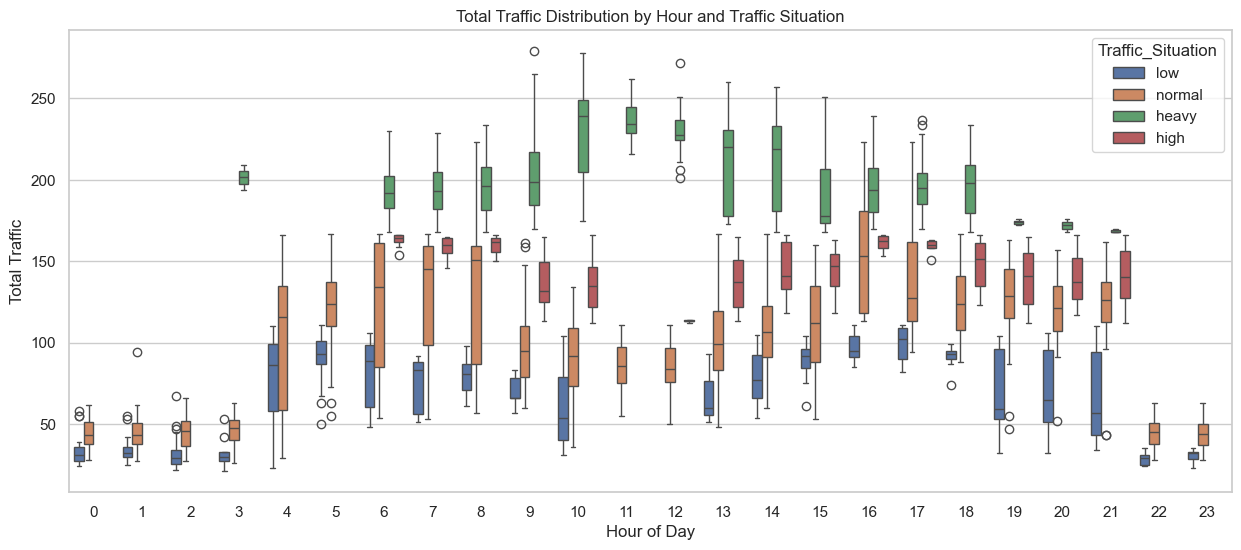

In [35]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Hour', y='Total', hue='Traffic_Situation', data=data)
plt.title('Total Traffic Distribution by Hour and Traffic Situation')
plt.xlabel('Hour of Day')
plt.ylabel('Total Traffic')
plt.show()


Observations:
------------
1."Low" traffic is mostly observed between midnight to early morning hours (0–4 AM and again after 20:00), indicating minimal vehicle movement during these times.
2."Heavy" and "High" traffic are concentrated during the morning (6–11 AM) and evening (16–19 PM) hours, which aligns with typical peak traffic periods.
3.Outliers seen in "heavy" and "high" categories during peak hours indicate sporadic spikes in traffic, possibly due to roadblocks, events, or accidents.
4.The median and IQR for "normal" traffic remain consistent throughout the day, showing stable flow during non-peak hours.

In [13]:
data['Hour'] = pd.to_datetime(data['Time'], format='%I:%M:%S %p').dt.hour

# Drop original 'Time' column
data = data.drop('Time', axis=1)

X = data.drop('Traffic_Situation', axis=1)  # replace 'target_column' with your target variable's column name
y = data['Traffic_Situation']

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import sparse_categorical_crossentropy
 
# --- Preprocessing ---
X = pd.get_dummies(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_encoded)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

num_classes = len(np.unique(y_resampled))

# Build ANN model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # instead of input_dim
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])


# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print summary
model.summary()

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


C:\Users\user\anaconda3\envs\tf_env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,172 (12.39 KB)

 Trainable params: 3,172 (12.39 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5680 - loss: 1.0906 - val_accuracy: 0.8567 - val_loss: 0.4484
Epoch 2/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8615 - loss: 0.4079 - val_accuracy: 0.8961 - val_loss: 0.2798
Epoch 3/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9160 - loss: 0.2669 - val_accuracy: 0.9307 - val_loss: 0.2156
Epoch 4/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9387 - loss: 0.2171 - val_accuracy: 0.9448 - val_loss: 0.1778
Epoch 5/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9483 - loss: 0.1777 - val_accuracy: 0.9532 - val_loss: 0.1501
Epoch 6/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9555 - loss: 0.1550 - val_accuracy: 0.9625 - val_loss: 0.1318
Epoch 7/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9612 - loss: 0.1398 - val_accuracy: 0.9654 - val_loss: 0.1178
Epoch 8/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9627 - loss: 0.1273 - val_accuracy: 0

In [22]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def build_model(hp):
    model = Sequential()
    model.add(tf.keras.Input(shape=(X_train.shape[1],)))  # use Input layer
    model.add(Dense(units=hp.Int('units1', min_value=32, max_value=128, step=16), activation='relu'))
    model.add(Dense(units=hp.Int('units2', min_value=16, max_value=64, step=16), activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))  # softmax for multi-class
    
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='ann_tuning_v1'
)

tuner.search(X_train, y_train, epochs=20, validation_split=0.2)
best_model = tuner.get_best_models(num_models=1)[0]

Reloading Tuner from tuner_dir\ann_tuning_v1\tuner0.json


C:\Users\user\anaconda3\envs\tf_env\lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Random Forest:", accuracy_score(y_test, rf.predict(X_test)))

svm = SVC()
svm.fit(X_train, y_train)
print("SVM:", accuracy_score(y_test, svm.predict(X_test)))

Random Forest: 0.9977544910179641
SVM: 0.9461077844311377


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predict on test data
ann_pred_probs = best_model.predict(X_test)
ann_pred = np.argmax(ann_pred_probs, axis=1)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, ann_pred))
print("Precision:", precision_score(y_test, ann_pred, average='macro'))
print("Recall:", recall_score(y_test, ann_pred, average='macro'))
print("F1 Score:", f1_score(y_test, ann_pred, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, ann_pred))
print("Classification Report:\n", classification_report(y_test, ann_pred))

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Accuracy: 0.9603293413173652
Precision: 0.9623982567459117
Recall: 0.9591563789866323
F1 Score: 0.9599768907580065
Confusion Matrix:
 [[340   1   0   0]
 [ 17 282   0  11]
 [  0   0 334  11]
 [  8   1   4 327]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       341
           1       0.99      0.91      0.95       310
           2       0.99      0.97      0.98       345
           3       0.94      0.96      0.95       340

    accuracy                           0.96      1336
   macro avg       0.96      0.96      0.96      1336
weighted avg       0.96      0.96      0.96      1336



Conclusion:
----------
A Vanilla Artificial Neural Network (ANN) was developed and fine-tuned to classify traffic situations (Low, Normal, High, Heavy) using vehicle count and time-related features.

After performing thorough data preprocessing, addressing class imbalance with SMOTE, and optimizing the ANN architecture using Keras Tuner, the model achieved:
Approximately 96% accuracy on the test set
High precision, recall, and F1-score across all classes
Strong generalization with no signs of overfitting

Comparative analysis with traditional machine learning models such as Random Forest and SVM showed competitive performance, but the ANN is more suitable for real-time and scalable deployment in traffic systems.

The model demonstrates high reliability for traffic classification tasks and can be further enhanced by incorporating additional features like vehicle speed, weather conditions, or event data for deeper traffic pattern analysis.